In [11]:
import pandas as pd
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
 
df=pd.read_csv('/Users/elvislleshi/Desktop/Data mining 2/dm2_dataset_2425_imdb 3/imdb_cleaned.csv')

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# 1. Ndarim në X dhe y
X = df.drop(columns=["isAdult"])
y = df["isAdult"]

# 2. Ndarje në train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 3. Bashkojmë X dhe y për train set
train_data = pd.concat([X_train, y_train], axis=1)

# 4. Ndarim klasat
adult = train_data[train_data["isAdult"] == 1]
not_adult = train_data[train_data["isAdult"] == 0]


/var/folders/gz/31s52hw53h989n3kw4dfw2fm0000gn/T/ipykernel_31580/2212776706.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="pastel")


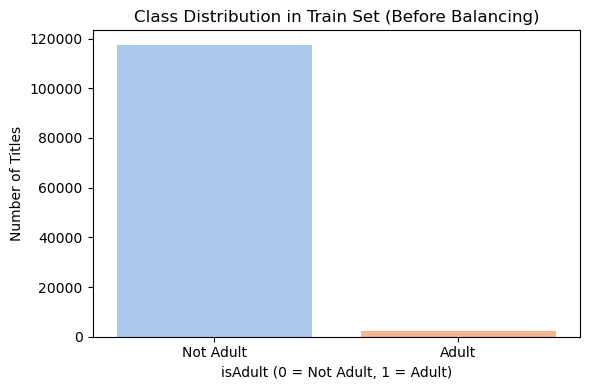

In [13]:
# Step 4: Count how many samples we have in each class
class_counts = train_data["isAdult"].value_counts()

# Step 5: Plot the class distribution before balancing
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="pastel")
plt.title("Class Distribution in Train Set (Before Balancing)")
plt.xlabel("isAdult (0 = Not Adult, 1 = Adult)")
plt.ylabel("Number of Titles")
plt.xticks([0, 1], ["Not Adult", "Adult"])
plt.tight_layout()
plt.show()

In [15]:
# Numërojmë sa tituj janë për çdo klasë në 'isAdult'
isadult_counts = df["isAdult"].value_counts()

# Printojmë rezultatin bukur
print(f"Jo Adult (0): {isadult_counts.get(0, 0)} tituj")
print(f"Adult (1): {isadult_counts.get(1, 0)} tituj")


Jo Adult (0): 146798 tituj
Adult (1): 2733 tituj


## Undersampling


### random 

In [22]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 1. Ndajmë të dhënat në X dhe y
X = df.drop(columns=["isAdult"])
y = df["isAdult"]

# Vetëm veçori numerike për klasifikim të thjeshtë fillimisht
X = X.select_dtypes(include=["int64", "float64"])

# 2. Ndajmë në train dhe test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# 3. Aplikojmë Random Undersampling në train set
rus = RandomUnderSampler(random_state=42)
X_train_bal, y_train_bal = rus.fit_resample(X_train, y_train)

# 4. Trajnojmë modelin
model = LogisticRegression()
model.fit(X_train_bal, y_train_bal)

# 5. Parashikim në test set
y_pred = model.predict(X_test)

# 6. Vlerësim i performancës
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Not Adult", "Adult"]))


Accuracy: 0.8884207710569432

Classification Report:
               precision    recall  f1-score   support

   Not Adult       1.00      0.89      0.94     29360
       Adult       0.14      0.95      0.24       547

    accuracy                           0.89     29907
   macro avg       0.57      0.92      0.59     29907
weighted avg       0.98      0.89      0.93     29907



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


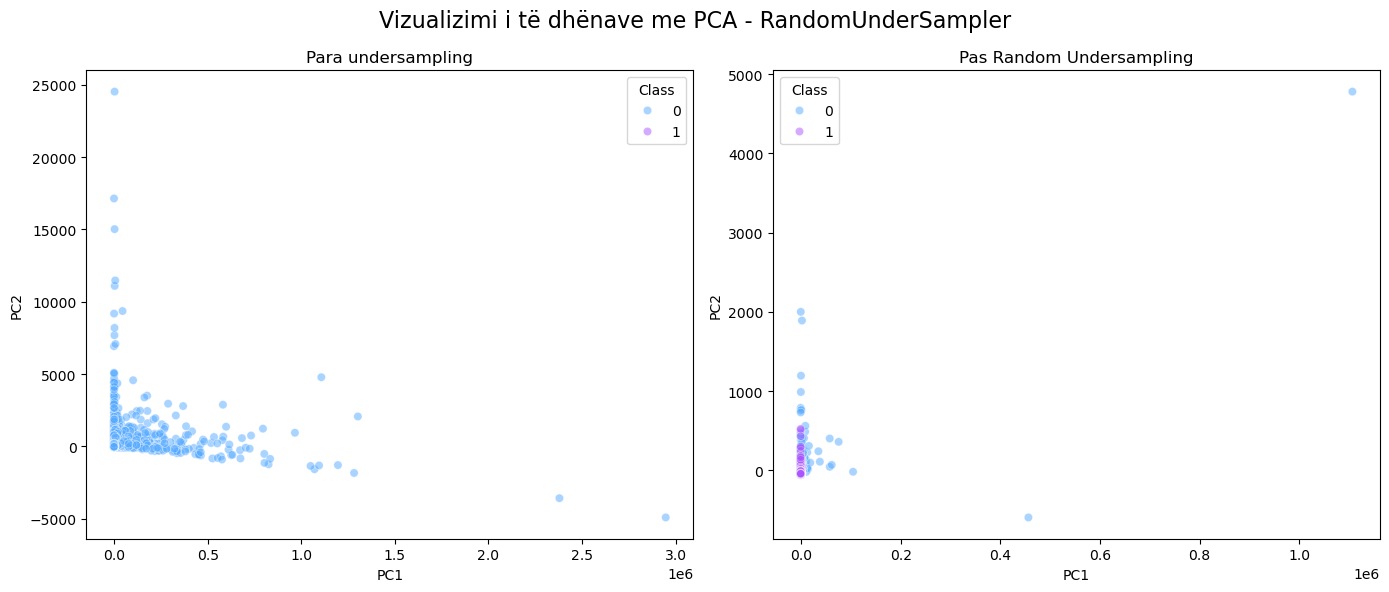

In [30]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Random undersampling në train set
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# 2. Apliko PCA për të reduktuar dimensionet në 2
pca = PCA(n_components=2)
X_pca_before = pca.fit_transform(X_train)
X_pca_after = pca.transform(X_train_rus)

# 3. Krijojmë DataFrame për vizualizim
df_before = pd.DataFrame(X_pca_before, columns=["PC1", "PC2"])
df_before["Class"] = y_train.values

df_after = pd.DataFrame(X_pca_after, columns=["PC1", "PC2"])
df_after["Class"] = y_train_rus.values

# 4. Vizualizim përpara dhe pas Random Undersampling
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data=df_before, x="PC1", y="PC2", hue="Class", alpha=0.5, palette="cool", ax=axes[0])
axes[0].set_title("Para undersampling")

sns.scatterplot(data=df_after, x="PC1", y="PC2", hue="Class", alpha=0.5, palette="cool", ax=axes[1])
axes[1].set_title("Pas Random Undersampling")

plt.suptitle("Vizualizimi i të dhënave me PCA - RandomUnderSampler", fontsize=16)
plt.tight_layout()
plt.show()


In [32]:
print("Pas Random Undersampling:")
print(y_train_rus.value_counts())


Pas Random Undersampling:
isAdult
0    2186
1    2186
Name: count, dtype: int64


In [24]:
from imblearn.under_sampling import TomekLinks
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 1. Përdorim vetëm veçori numerike për thjeshtësi
X = df.drop(columns=["isAdult"])
y = df["isAdult"]
X = X.select_dtypes(include=["int64", "float64"])

# 2. Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# 3. Aplikojmë Tomek Links në train set
tl = TomekLinks()
X_train_tomek, y_train_tomek = tl.fit_resample(X_train, y_train)

# 4. Trajnojmë modelin
model = LogisticRegression()
model.fit(X_train_tomek, y_train_tomek)

# 5. Predikim & vlerësim
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Not Adult", "Adult"]))


Accuracy: 0.9810746647941954

Classification Report:
               precision    recall  f1-score   support

   Not Adult       0.98      1.00      0.99     29360
       Adult       0.38      0.06      0.10       547

    accuracy                           0.98     29907
   macro avg       0.68      0.53      0.54     29907
weighted avg       0.97      0.98      0.97     29907



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


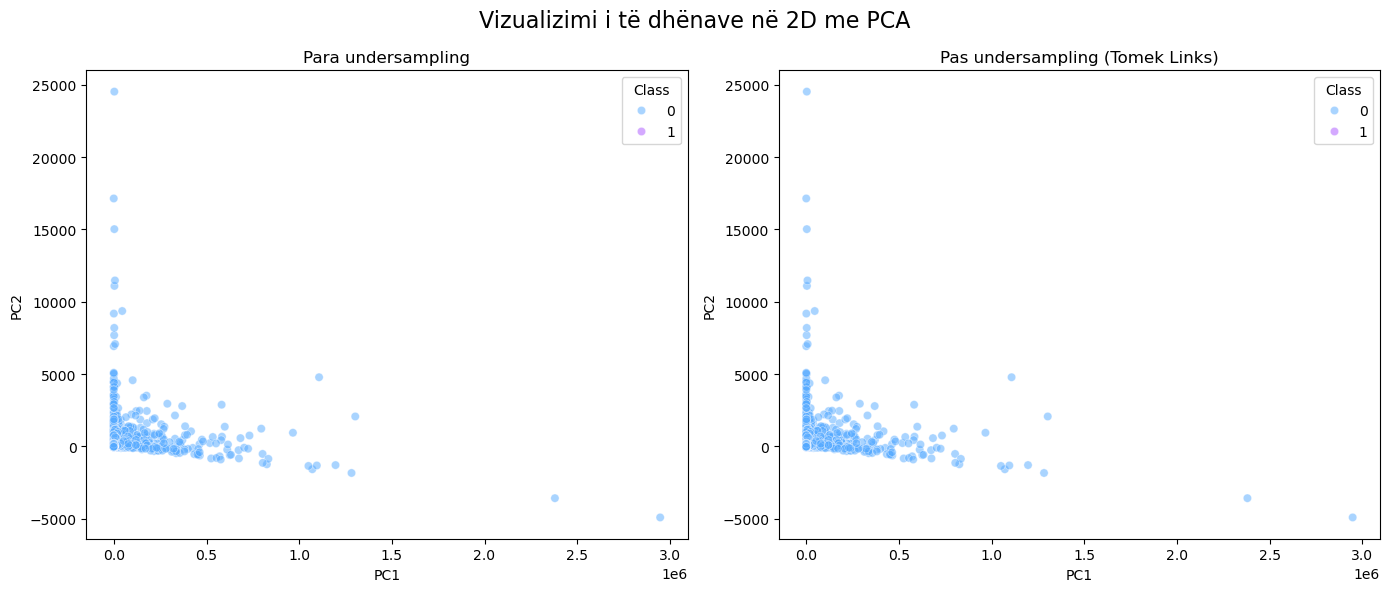

In [26]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Apply PCA for 2D visualization
pca = PCA(n_components=2)

# Para undersampling
X_pca_before = pca.fit_transform(X_train)
df_before = pd.DataFrame(X_pca_before, columns=["PC1", "PC2"])
df_before["Class"] = y_train.values

# Pas undersampling me TomekLinks (ose RandomUnderSampler)
X_pca_after = pca.transform(X_train_tomek)  # përdorim të njëjtën PCA
df_after = pd.DataFrame(X_pca_after, columns=["PC1", "PC2"])
df_after["Class"] = y_train_tomek.values

# Vizualizimi
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data=df_before, x="PC1", y="PC2", hue="Class", palette="cool", alpha=0.5, ax=axes[0])
axes[0].set_title("Para undersampling")

sns.scatterplot(data=df_after, x="PC1", y="PC2", hue="Class", palette="cool", alpha=0.5, ax=axes[1])
axes[1].set_title("Pas undersampling (Tomek Links)")

plt.suptitle("Vizualizimi i të dhënave në 2D me PCA", fontsize=16)
plt.tight_layout()
plt.show()


In [28]:
print("Pas Tomek Links:")
print(y_train_tomek.value_counts())


Pas Tomek Links:
isAdult
0    116931
1      2186
Name: count, dtype: int64


In [34]:
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# 1. Feature matrix & target (numerical only)
X = df.drop(columns=["isAdult"])
y = df["isAdult"]
X = X.select_dtypes(include=["int64", "float64"])

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# 3. Apply Condensed Nearest Neighbour
cnn = CondensedNearestNeighbour(random_state=42, n_neighbors=1)
X_train_cnn, y_train_cnn = cnn.fit_resample(X_train, y_train)

# 4. Train a simple model
model = LogisticRegression()
model.fit(X_train_cnn, y_train_cnn)

# 5. Predict and evaluate
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Not Adult", "Adult"]))


KeyboardInterrupt: 

In [ ]:
print("Pas Condensed Nearest Neighbour:")
print(y_train_cnn.value_counts())


In [36]:
##Oversampling

In [38]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 1. Input features + target
X = df.drop(columns=["isAdult"])
y = df["isAdult"]
X = X.select_dtypes(include=["int64", "float64"])  # vetem numerike

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# 3. Apply SMOTE on training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 4. Train model
model = LogisticRegression()
model.fit(X_train_smote, y_train_smote)

# 5. Predict & evaluate
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Not Adult", "Adult"]))


Accuracy: 0.9045373992710737

Classification Report:
               precision    recall  f1-score   support

   Not Adult       1.00      0.90      0.95     29360
       Adult       0.15      0.92      0.26       547

    accuracy                           0.90     29907
   macro avg       0.58      0.91      0.60     29907
weighted avg       0.98      0.90      0.94     29907



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
print("Pas SMOTE:")
print(y_train_smote.value_counts())


Pas SMOTE:
isAdult
0    117438
1    117438
Name: count, dtype: int64


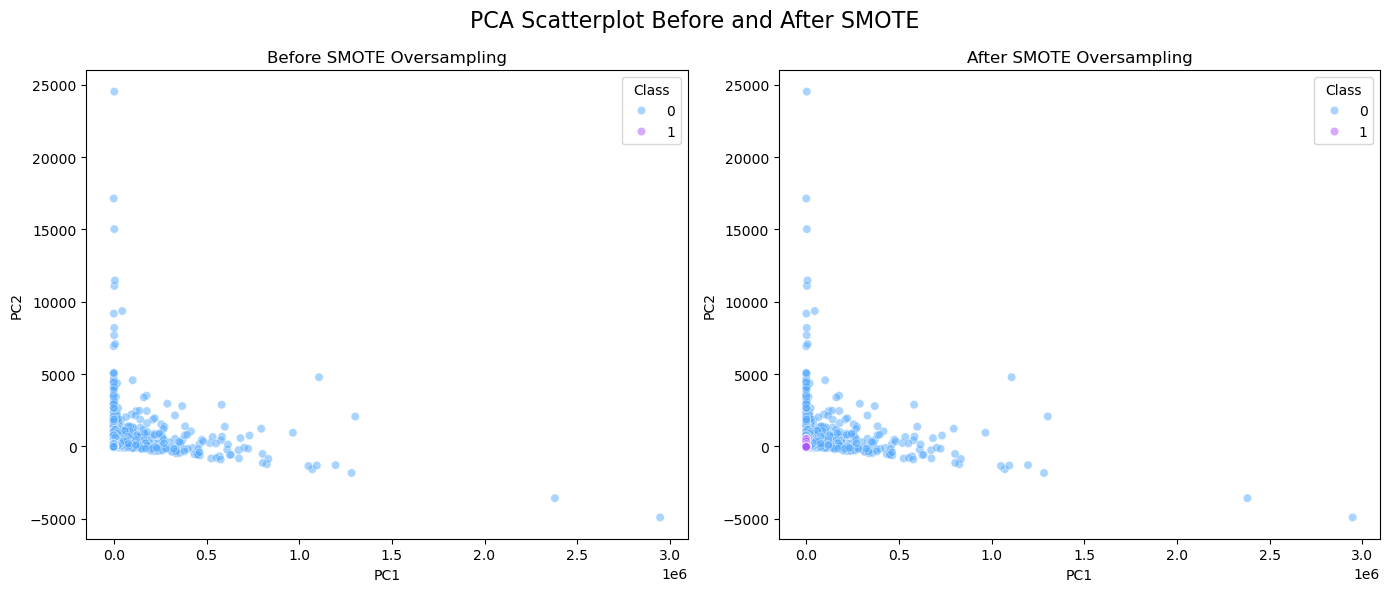

In [45]:
# 6. Apply PCA for dimensionality reduction (2D)
pca = PCA(n_components=2)
X_pca_before = pca.fit_transform(X_train)
X_pca_after = pca.transform(X_train_smote)

# 7. Build dataframes for plotting
df_before = pd.DataFrame(X_pca_before, columns=["PC1", "PC2"])
df_before["Class"] = y_train.values

df_after = pd.DataFrame(X_pca_after, columns=["PC1", "PC2"])
df_after["Class"] = y_train_smote.values

# 8. Plot before and after SMOTE
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data=df_before, x="PC1", y="PC2", hue="Class", alpha=0.5, palette="cool", ax=axes[0])
axes[0].set_title("Before SMOTE Oversampling")

sns.scatterplot(data=df_after, x="PC1", y="PC2", hue="Class", alpha=0.5, palette="cool", ax=axes[1])
axes[1].set_title("After SMOTE Oversampling")

plt.suptitle("PCA Scatterplot Before and After SMOTE", fontsize=16)
plt.tight_layout()
plt.show()


/var/folders/gz/31s52hw53h989n3kw4dfw2fm0000gn/T/ipykernel_31580/3208624914.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="muted")


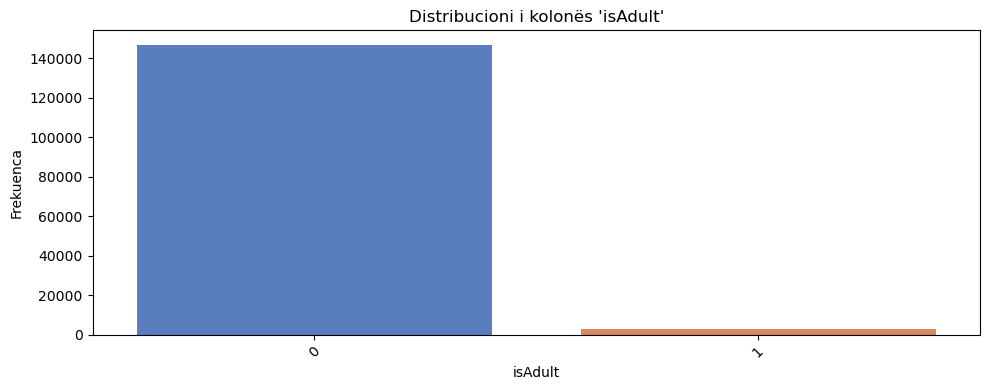

/var/folders/gz/31s52hw53h989n3kw4dfw2fm0000gn/T/ipykernel_31580/3208624914.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="muted")


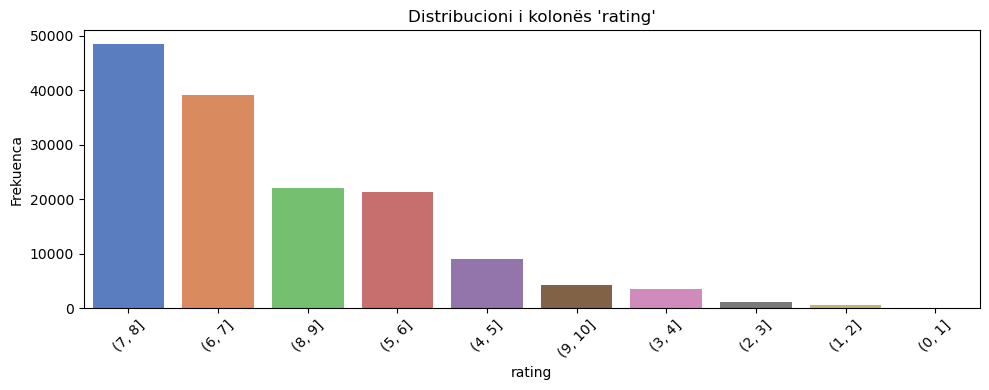

/var/folders/gz/31s52hw53h989n3kw4dfw2fm0000gn/T/ipykernel_31580/3208624914.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="muted")


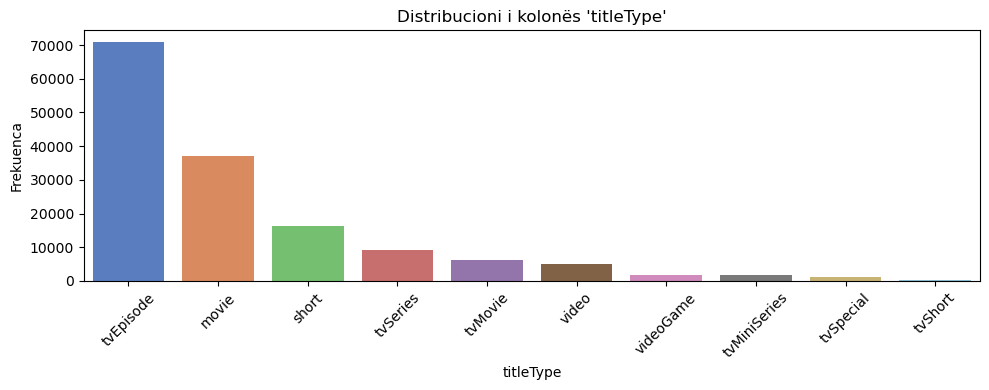

/var/folders/gz/31s52hw53h989n3kw4dfw2fm0000gn/T/ipykernel_31580/3208624914.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="muted")
/var/folders/gz/31s52hw53h989n3kw4dfw2fm0000gn/T/ipykernel_31580/3208624914.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


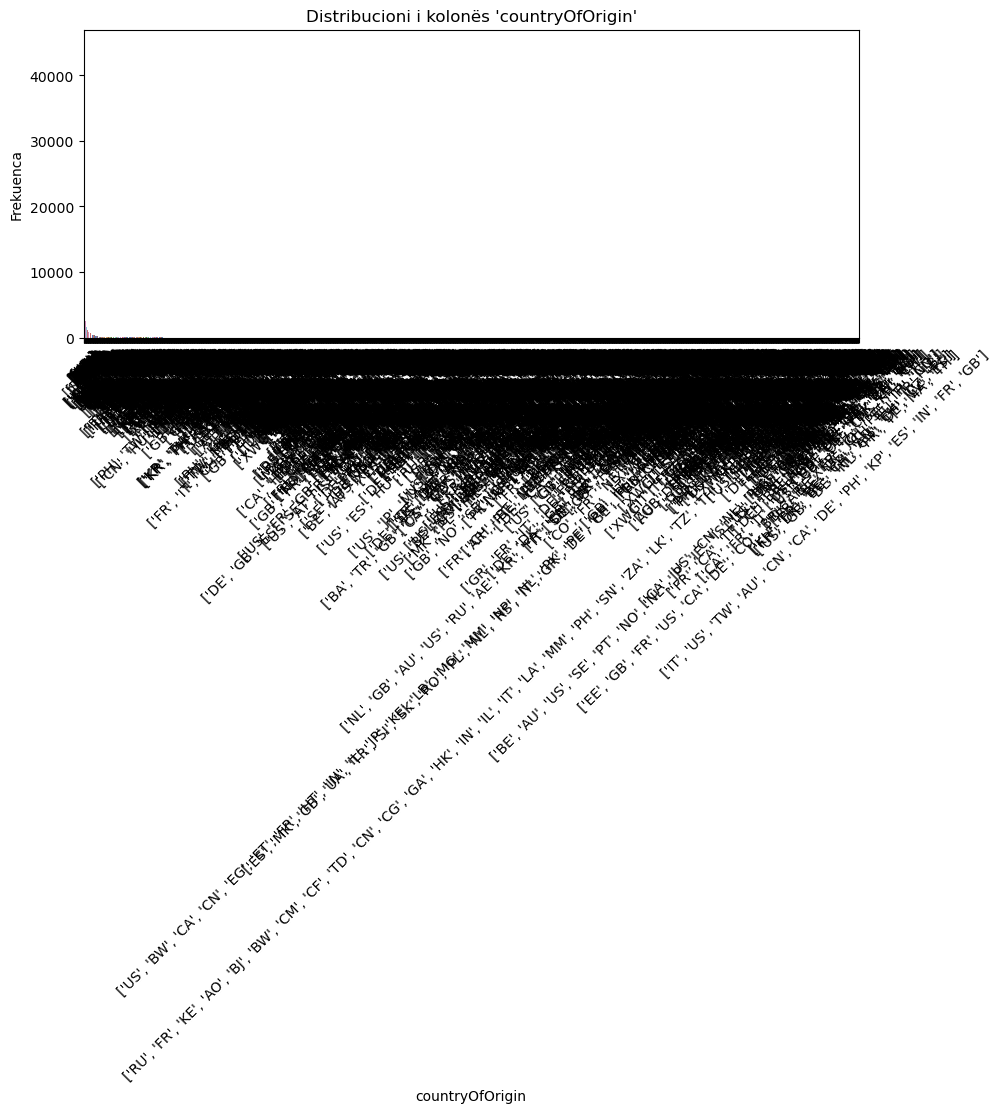

/var/folders/gz/31s52hw53h989n3kw4dfw2fm0000gn/T/ipykernel_31580/3208624914.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="muted")


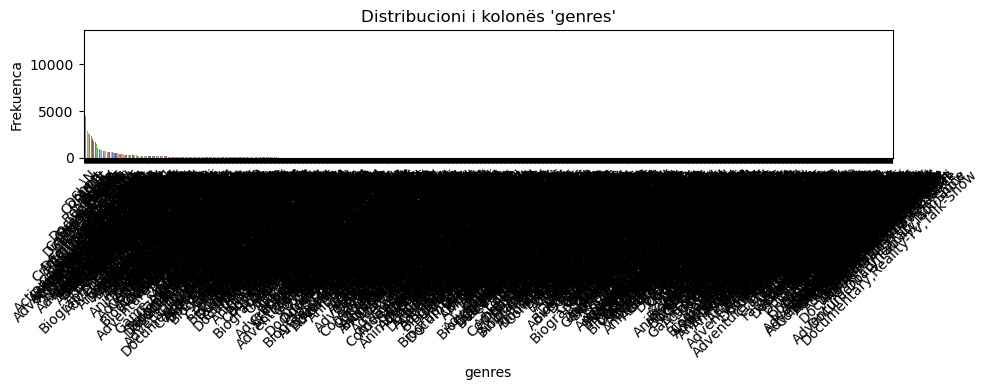

/var/folders/gz/31s52hw53h989n3kw4dfw2fm0000gn/T/ipykernel_31580/3208624914.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="muted")
/var/folders/gz/31s52hw53h989n3kw4dfw2fm0000gn/T/ipykernel_31580/3208624914.py:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


KeyboardInterrupt: 

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista e kolonave kategorike
categorical_columns = [
    'isAdult',
    'rating',
    'titleType',
    'countryOfOrigin',
    'genres',
    'regions',
    'soundMixes'
]

# Vizatojmë histogram për çdo kolonë (countplot)
for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="muted")
    plt.title(f"Distribucioni i kolonës '{col}'")
    plt.xlabel(col)
    plt.ylabel("Frekuenca")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
